In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [44]:
df = pd.read_csv("resources/StudentsPerformance.csv")

In [45]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [46]:
def calc_score_aggregate(dataframe, column):
    return dataframe.groupby(column).mean(["math score", "reading score", "writing score"])

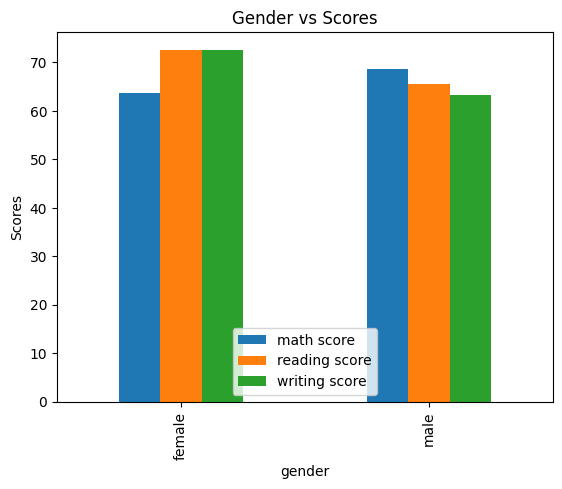

In [47]:
calc_score_aggregate(df, "gender").plot.bar(title="Gender vs Scores", ylabel="Scores")
plt.legend(loc="best")

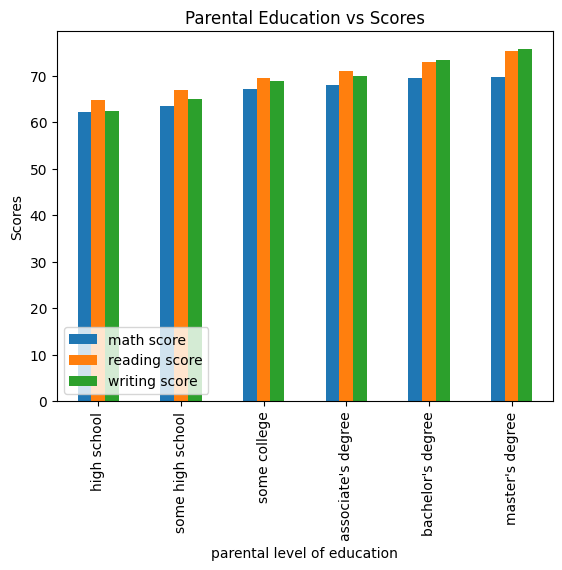

In [49]:
parental_education_order = {
    'high school': 0,
    'some high school': 1,
    'some college': 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5
}
calc_score_aggregate(df, "parental level of education").sort_values(by=["parental level of education"],
                                                                    key=lambda x: x.map(
                                                                        parental_education_order)).plot.bar(
    title="Parental Education vs Scores", ylabel="Scores")
plt.legend(loc="lower left")

<Axes: ylabel='race/ethnicity'>

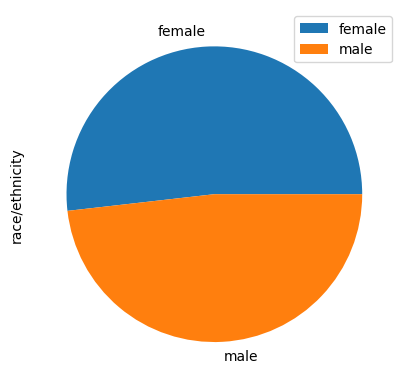

In [53]:
df.groupby("gender").count().plot.pie(y="race/ethnicity")

D:\Code\Python\data-engineering-practice\venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='math score', ylabel='reading score'>

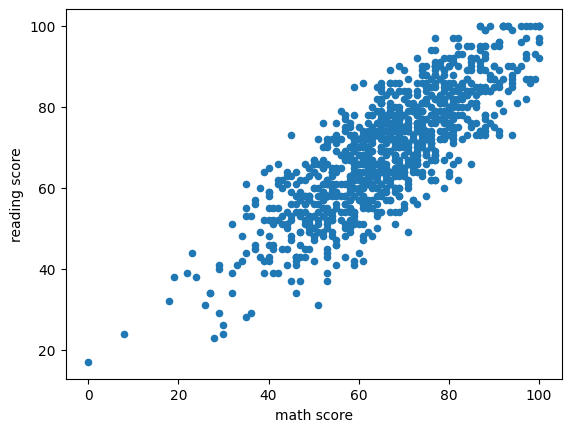

In [54]:
df[["math score", "reading score"]].plot.scatter(x="math score", y="reading score")
#
# ax1 = df.plot(kind='scatter', x='math score', y='reading score', color='r')
# ax2 = df.plot(kind='scatter', x='reading score', y='writing score', color='g', ax=ax1)
# ax3 = df.plot(kind='scatter', x='writing score', y='math score', color='b', ax=ax1)

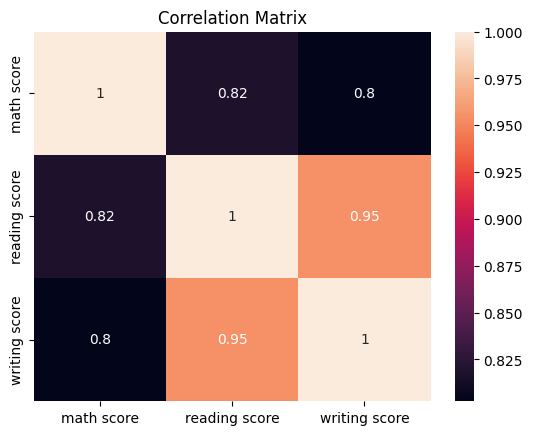

In [55]:
correlated_scores = df.corr()
sns.heatmap(correlated_scores, annot=True)
plt.title("Correlation Matrix")
plt.show()

<Axes: title={'center': 'average'}, xlabel='gender'>

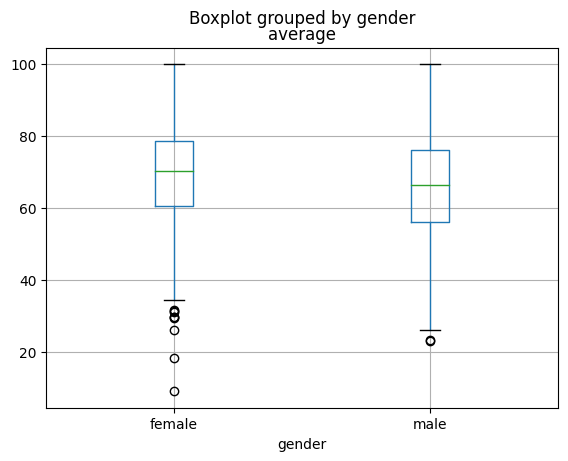

In [70]:
df['average'] = df[["reading score", "writing score", "math score"]].mean(axis=1)
df.boxplot(column=["average"], by='gender')